<a href="https://colab.research.google.com/github/mashaan14/YouTube-channel/blob/main/2023_11_12_graph_Laplacian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral Clustering

## YouTube:
I explained this notebook in a [YouTube video](https://youtu.be/k7M1TMYac-Y).

## References:
```bibtex
@inproceedings{NIPS2001_801272ee,
  author    = {Ng, Andrew and Jordan, Michael and Weiss, Yair},
  booktitle = {Advances in Neural Information Processing Systems},
  title     = {On Spectral Clustering: Analysis and an algorithm},
  year      = {2001}
}
```

```bibtex
@misc{vonluxburg2007tutorial,
  title         = {A Tutorial on Spectral Clustering},
  author        = {Ulrike von Luxburg},
  year          = {2007},
  eprint        = {0711.0189},
  archivePrefix = {arXiv},
  primaryClass  = {cs.DS}
}
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from sklearn.neighbors import kneighbors_graph
from scipy.spatial import distance

In [ ]:
features_cluster1 = np.array([
    [-0.32463899, -0.23100812],
    [ 0.13121718, -0.37920586],
    [ 0.13854759,  0.37837102],
    [-0.32047612,  0.22657314],
    [ 0.42269755, -0.01454366]])
features_cluster2 = np.array([
    [-3.0, 3.0],
    [-2.5, 2.5],
    [-3.2, 2.55]])

features = np.vstack((features_cluster1, features_cluster2))

{(0, 1): Text(-0.09671090500000001, -0.30510699, '1.0'),
 (0, 2): Text(-0.09304570000000001, 0.07368145, '1.0'),
 (0, 3): Text(-0.322557555, -0.0022174900000000025, '1.0'),
 (0, 4): Text(0.04902927999999998, -0.12277589, '1.0'),
 (1, 3): Text(-0.09462947, -0.07631636, '1.0'),
 (1, 4): Text(0.276957365, -0.19687476, '1.0'),
 (1, 2): Text(0.134882385, -0.0004174200000000017, '1.0'),
 (2, 3): Text(-0.09096426499999999, 0.30247208000000003, '1.0'),
 (2, 4): Text(0.28062257, 0.18191368, '1.0'),
 (3, 5): Text(-1.66023806, 1.61328657, '1.0'),
 (3, 6): Text(-1.41023806, 1.36328657, '1.0'),
 (3, 7): Text(-1.76023806, 1.38828657, '1.0'),
 (5, 6): Text(-2.75, 2.75, '1.0'),
 (5, 7): Text(-3.1, 2.775, '1.0'),
 (6, 7): Text(-2.85, 2.525, '1.0')}

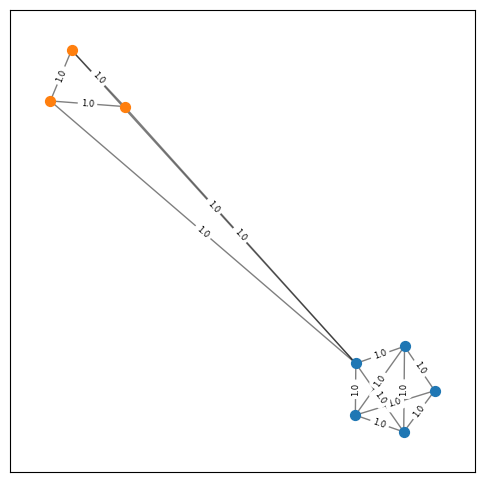

In [ ]:
# start knn adj matrix ---------------------------------------
g = kneighbors_graph(features, 3)
g = np.array(g.todense(), dtype=np.float32)
# end knn adj matrix ----------------------------------------

# plot adj_mods -------
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
G = nx.from_numpy_array(g)

nx.draw_networkx_nodes(G, features,
                    nodelist=[0, 1, 2, 3, 4],
                    node_color='#1f77b4', # '#000000',
                    node_size=50,
                    alpha=1.0)
nx.draw_networkx_nodes(G, features,
                    nodelist=[5, 6, 7],
                    node_color='#ff7f0e', # '#000000',
                    node_size=50,
                    alpha=1.0)
nx.draw_networkx_edges(G, features, width=1.0, alpha=0.5)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, features, edge_labels=labels, font_size=6)

In [ ]:
g

array([[0., 1., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0., 1., 1., 0.]], dtype=float32)

In [ ]:
g1 = np.array([[0., 1., 0., 0., 1., 0., 0., 0.],
                [1., 0., 1., 0., 0., 0., 0., 0.],
                [0., 1., 0., 1., 0., 0., 0., 0.],
                [0., 0., 1., 0., 1., 0., 0., 0.],
                [1., 0., 0., 1., 0., 0., 0., 0.],
                [0., 0., 0., 0., 0., 0., 1., 1.],
                [0., 0., 0., 0., 0., 1., 0., 1.],
                [0., 0., 0., 0., 0., 1., 1., 0.]])

{(0, 1): Text(-0.09671090500000001, -0.30510699, '1.0'),
 (0, 4): Text(0.04902927999999998, -0.12277589, '1.0'),
 (1, 2): Text(0.134882385, -0.0004174200000000017, '1.0'),
 (2, 3): Text(-0.09096426499999999, 0.30247208000000003, '1.0'),
 (3, 4): Text(0.051110715, 0.10601474, '1.0'),
 (5, 6): Text(-2.75, 2.75, '1.0'),
 (5, 7): Text(-3.1, 2.775, '1.0'),
 (6, 7): Text(-2.85, 2.525, '1.0')}

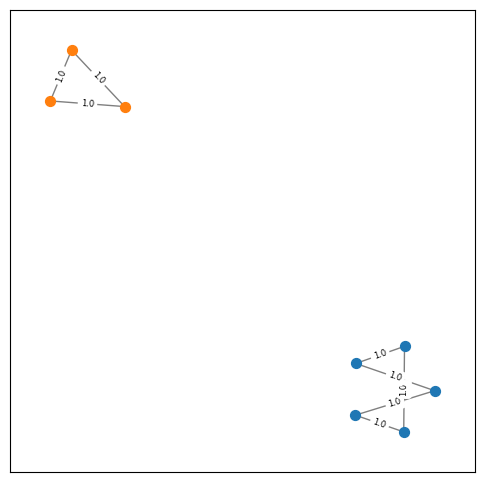

In [ ]:
# plot adj_mods -------
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
G = nx.from_numpy_array(g1)

nx.draw_networkx_nodes(G, features,
                    nodelist=[0, 1, 2, 3, 4],
                    node_color='#1f77b4', # '#000000',
                    node_size=50,
                    alpha=1.0)
nx.draw_networkx_nodes(G, features,
                    nodelist=[5, 6, 7],
                    node_color='#ff7f0e', # '#000000',
                    node_size=50,
                    alpha=1.0)
nx.draw_networkx_edges(G, features, width=1.0, alpha=0.5)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, features, edge_labels=labels, font_size=6)

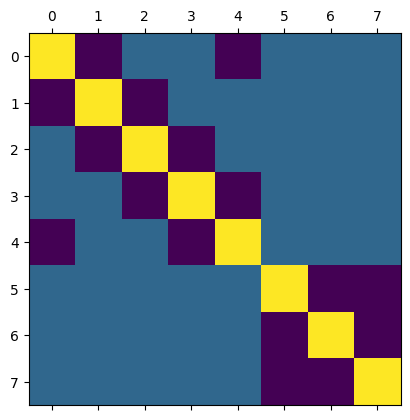

In [ ]:
A = g1
# identity matrix
I = np.zeros_like(A)
np.fill_diagonal(I, 1)

# degree matrix
D = np.zeros_like(A)
np.fill_diagonal(D, np.sum(A,axis=1))
D_inv_sqrt = np.linalg.inv(np.sqrt(D))

L = I - np.dot(D_inv_sqrt, A).dot(D_inv_sqrt)
plt.matshow(L)

In [ ]:
L

array([[ 1. , -0.5,  0. ,  0. , -0.5,  0. ,  0. ,  0. ],
       [-0.5,  1. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  1. , -0.5,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -0.5,  1. , -0.5,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0. , -0.5,  1. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  1. , -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.5,  1. , -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.5, -0.5,  1. ]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(L)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real
# Order the eigenvectors in a decreasing order based on the magnitude of their corresponding eigenvalues
eigenvectors_sorted = eigenvectors[:,eigenvalues.argsort()]

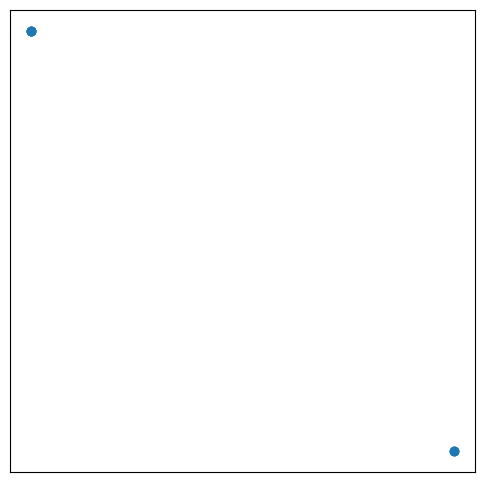

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(eigenvectors_sorted[:,0], eigenvectors_sorted[:,1]);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);
plt.savefig('X_transformed.png', bbox_inches='tight', dpi=600)

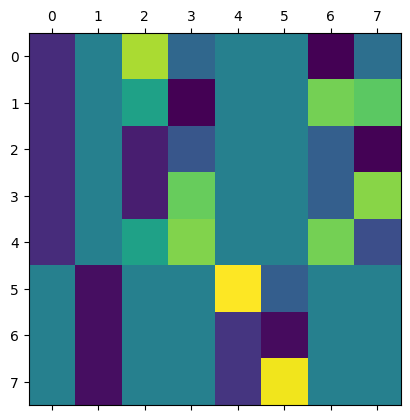

In [ ]:
plt.matshow(eigenvectors_sorted)